In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
# Path where your dataset is stored
dataset_path = r"C:\Users\VICTUS\data valley projects\fall detection\fall_dataset"  # Example: "C:/Users/YourName/FallDetection/dataset"


In [3]:
# Image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=20,   # Randomly rotate images
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting into training and validation
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,            # Directory containing dataset
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,           # Number of images per batch
    class_mode='binary',     # Binary classification (Fall / Not Fall)
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 390 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


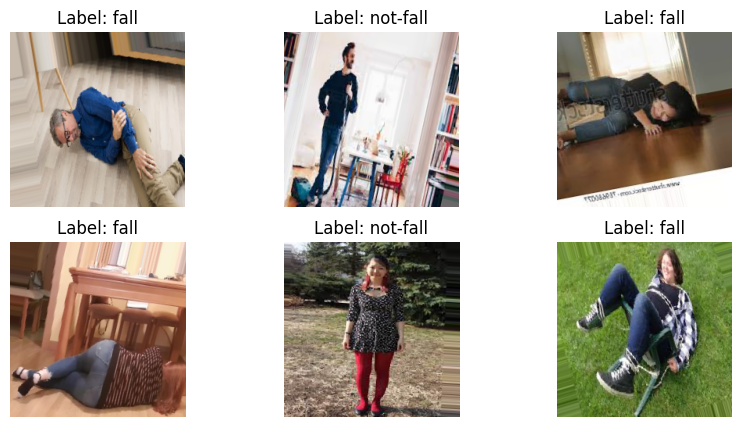

In [4]:
# Display some sample images from training set
class_names = list(train_generator.class_indices.keys())

def display_sample_images(generator):
    images, labels = next(generator)  # Get first batch
    plt.figure(figsize=(10, 5))

    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {class_names[int(labels[i])]}")
        plt.axis("off")

    plt.show()

display_sample_images(train_generator)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
import os


In [15]:
# Load the MobileNetV2 model (without top layers)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model to retain learned features
base_model.trainable = False

# Build the CNN Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # 1 neuron for binary classification (Fall/Not Fall)
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 8,028,417 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase epochs for better results
    verbose=1
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8955 - loss: 0.2311 - val_accuracy: 0.6875 - val_loss: 0.7708
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 993ms/step - accuracy: 0.8921 - loss: 0.2418 - val_accuracy: 0.7188 - val_loss: 0.7784
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9163 - loss: 0.2194 - val_accuracy: 0.7396 - val_loss: 0.7660
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9040 - loss: 0.2244 - val_accuracy: 0.7604 - val_loss: 0.8565
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8650 - loss: 0.3019 - val_accuracy: 0.7917 - val_loss: 0.4387
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8971 - loss: 0.2311 - val_accuracy: 0.8125 - val_loss: 0.5339
Epoch 7/10
 4/13 ━━━━━━━━━━━━━━━━━━━━ 7s 858ms/step - accuracy: 0.9349 - loss: 0.1580

In [ ]:
# Plot Training Accuracy and Loss
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_fall(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print("No Fall Detected! 🚨")
    else:
        print("Fall Detected ✅")

# Test with a new image
predict_fall(r"C:\Users\VICTUS\data valley projects\fall detection\fall_dataset\fall\13.jpg")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_fall(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert image to array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]

    # Determine result
    if prediction > 0.5:
        label = "No Fall Detected ✅"
        color = "green"
    else:
        label = "Fall Detected! 🚨"
        color = "red"

    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(label, fontsize=14, color=color)
    plt.show()

# Test with a new image
predict_fall(r"C:\Users\VICTUS\data valley projects\fall detection\fall_dataset\fall\13.jpg")
